### Import Libraries

In [51]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pylab
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

### Read Data Set using Pandas

In [23]:
wifi = pd.read_csv('trainingData.csv')

### Analysis

In [24]:
wifi.head()

,longitude,latitude,floor,building,space,position,userID,phoneID,timestamp,WAP001,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,-7541.2643,4864920.778,2,1,106,2,2,23,1371713733,100,...,100,100,100,100,100,100,100,100,100,100
1,-7536.6212,4864934.225,2,1,106,2,2,23,1371713691,100,...,100,100,100,100,100,100,100,100,100,100
2,-7519.1524,4864949.532,2,1,103,2,2,23,1371714095,100,...,100,100,100,100,100,100,100,100,100,100
3,-7524.5704,4864934.093,2,1,102,2,2,23,1371713807,100,...,100,100,100,100,100,100,100,100,100,100
4,-7632.1436,4864982.217,0,0,122,2,11,13,1369909710,100,...,100,100,100,100,100,100,100,100,100,100


In [25]:
wifi.describe()

,longitude,latitude,floor,building,space,position,userID,phoneID,timestamp,WAP001,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04,19937.000000,...,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.0
mean,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09,99.823644,...,84.974921,99.866881,98.881276,98.833325,99.436525,73.705673,59.889803,99.788634,99.970507,100.0
std,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05,5.866842,...,50.099899,5.023663,14.206023,14.634613,10.259137,62.278292,74.060259,6.360671,2.404232,0.0
min,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09,-97.000000,...,-103.000000,-97.000000,-92.000000,-90.000000,-97.000000,-101.000000,-101.000000,-97.000000,-97.000000,100.0
25%,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
50%,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
75%,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
max,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0


In [26]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, longitude to WAP520
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [27]:
wifi.min()

longitude   -7.691338e+03
latitude     4.864746e+06
floor        0.000000e+00
building     0.000000e+00
space        1.000000e+00
position     1.000000e+00
userID       1.000000e+00
phoneID      1.000000e+00
timestamp    1.369909e+09
WAP001      -9.700000e+01
WAP002      -9.000000e+01
WAP003       1.000000e+02
WAP004       1.000000e+02
WAP005      -9.700000e+01
WAP006      -9.800000e+01
WAP007      -9.900000e+01
WAP008      -9.800000e+01
WAP009      -9.800000e+01
WAP010      -9.900000e+01
WAP011      -1.010000e+02
WAP012      -1.010000e+02
WAP013      -9.800000e+01
WAP014      -9.800000e+01
WAP015      -1.010000e+02
WAP016      -9.900000e+01
WAP017      -9.800000e+01
WAP018      -9.800000e+01
WAP019      -9.900000e+01
WAP020      -9.900000e+01
WAP021      -9.800000e+01
                 ...     
WAP491       1.000000e+02
WAP492      -9.000000e+01
WAP493      -9.100000e+01
WAP494      -9.700000e+01
WAP495      -1.000000e+02
WAP496      -1.010000e+02
WAP497       1.000000e+02
WAP498      

### Building Analysis

In [29]:
wifi.groupby('building')['building'].count()

building
0    5249
1    5196
2    9492
Name: building, dtype: int64

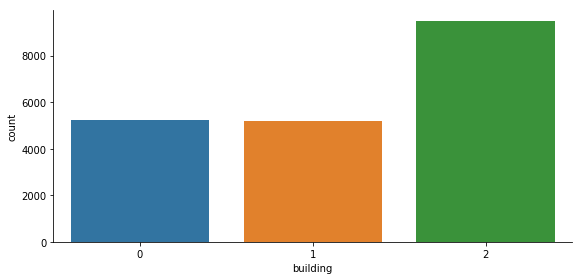

In [30]:
fg = sns.factorplot('building', data=wifi, kind='count', aspect=2)
fg.set_xlabels('building')

Building 2 has about the same amount of records as building 0 and 1 combined. 

### Floor Analysis

In [42]:
wifi.groupby('floor')['floor'].count()

floor
0    4369
1    5002
2    4416
3    5048
4    1102
Name: floor, dtype: int64

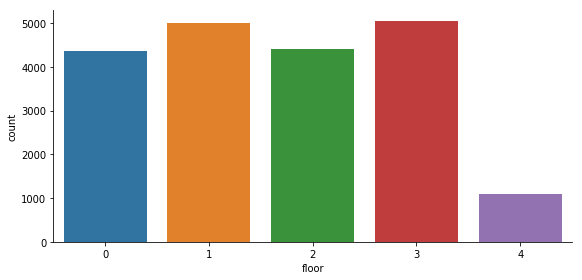

In [34]:
fg = sns.factorplot('floor', data=wifi, kind='count', aspect=2)
fg.set_xlabels('floor')

In [37]:
wifi.groupby(['building','floor']).floor.count()

building  floor
0         0        1059
          1        1356
          2        1443
          3        1391
1         0        1368
          1        1484
          2        1396
          3         948
2         0        1942
          1        2162
          2        1577
          3        2709
          4        1102
Name: floor, dtype: int64

### Position Analysis

In [43]:
wifi.groupby('position')['position'].count()

position
1     3329
2    16608
Name: position, dtype: int64

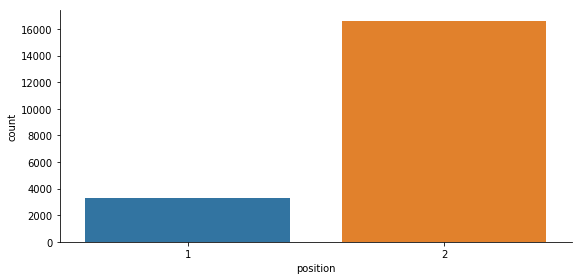

In [41]:
fg = sns.factorplot('position', data=wifi, kind='count', aspect=2)
fg.set_xlabels('position')

In [38]:
wifi.groupby(['building','floor','position']).position.count()

building  floor  position
0         0      2           1059
          1      1             10
                 2           1346
          2      1             19
                 2           1424
          3      2           1391
1         0      1            486
                 2            882
          1      1            559
                 2            925
          2      1            413
                 2            983
          3      1            179
                 2            769
2         0      1            487
                 2           1455
          1      1            561
                 2           1601
          2      1            294
                 2           1283
          3      1            301
                 2           2408
          4      1             20
                 2           1082
Name: position, dtype: int64

### Space Analysis

In [44]:
wifi.groupby('space')['space'].count()

space
1       65
2       80
3       97
4       95
5       60
6       79
7       38
8       56
9       60
10      89
11      17
12      20
13      39
14      12
15      30
16      42
17      24
18      19
22      10
25      19
26      22
27      17
28      17
29      20
30      22
101    418
102    418
103    415
104    439
105    366
      ... 
223    125
224    193
225    129
226    108
227    118
228     99
229    118
230    129
231    110
232     39
233     60
234     99
235    121
236     80
237     80
238     59
239     40
240     20
241     55
242     30
243     49
244     70
245     40
246     40
247    100
248    110
249     30
250     20
253     20
254     10
Name: space, Length: 123, dtype: int64

In [39]:
wifi.groupby(['building','floor','position','space']).space.count()

building  floor  position  space
0         0      2         102      20
                           106      10
                           107      10
                           110      10
                           111      20
                           112      20
                           113      20
                           114      19
                           115      16
                           116      13
                           117      10
                           118      16
                           119      25
                           120      42
                           121      20
                           122      21
                           123      20
                           125      19
                           126      19
                           127      19
                           128      29
                           129      20
                           130      20
                           131      10
                           132 

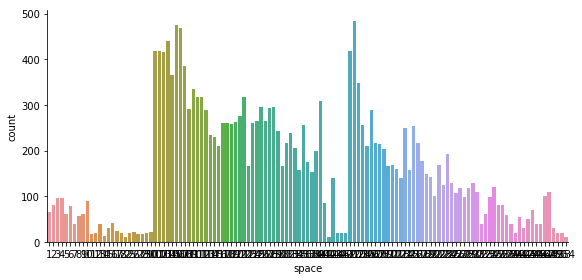

In [45]:
fg = sns.factorplot('space', data=wifi, kind='count', aspect=2)
fg.set_xlabels('space')

### WAP Analysis

In [104]:
waps = wifi.iloc[:,9:529]
waps.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [105]:
#Find waps variances
selector = VarianceThreshold()
selector.fit_transform(waps)
selector.variances_

array([3.44181138e+01, 3.36169304e+01, 0.00000000e+00, 0.00000000e+00,
       7.42258294e+01, 5.25845196e+02, 9.32726375e+02, 1.08963213e+03,
       9.18352029e+02, 1.59611090e+02, 3.86648012e+03, 3.89882848e+03,
       2.70444932e+03, 2.68341692e+03, 1.65732270e+03, 1.66719929e+03,
       1.51330676e+02, 1.59305667e+02, 6.32107554e+02, 5.89108067e+02,
       6.98801179e+01, 6.96856656e+01, 1.19430812e+03, 1.20154331e+03,
       9.72219898e+02, 1.00950067e+03, 1.19234002e+03, 1.23263893e+03,
       2.11041071e+03, 2.19214673e+03, 9.05204434e+02, 9.01609982e+02,
       2.16342311e+03, 2.15457407e+03, 2.57042429e+03, 2.57383449e+03,
       1.34303223e+03, 1.11214545e+03, 2.07156164e+03, 2.12098317e+03,
       2.38579525e+03, 2.41758284e+03, 1.66393746e+03, 1.70950593e+03,
       1.19889997e+03, 1.30665575e+03, 2.00565946e+03, 2.02168869e+03,
       6.05248683e+02, 6.63814825e+02, 3.03404147e+03, 2.98157253e+03,
       1.52539535e+03, 1.56725731e+03, 5.72123329e+01, 6.05666585e+01,
      

In [106]:
#Remove waps with zero variance
waps = waps.loc[:, waps.var() != 0.0]
waps.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [114]:
#Join reduced wap signals to the rest of the data source
data = wifi.iloc[:,0:9]
prepdata = data.join(waps)
prepdata.head()

,longitude,latitude,floor,building,space,position,userID,phoneID,timestamp,WAP001,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
0,-7541.2643,4864920.778,2,1,106,2,2,23,1371713733,100,...,100,100,100,100,100,100,100,100,100,100
1,-7536.6212,4864934.225,2,1,106,2,2,23,1371713691,100,...,100,100,100,100,100,100,100,100,100,100
2,-7519.1524,4864949.532,2,1,103,2,2,23,1371714095,100,...,100,100,100,100,100,100,100,100,100,100
3,-7524.5704,4864934.093,2,1,102,2,2,23,1371713807,100,...,100,100,100,100,100,100,100,100,100,100
4,-7632.1436,4864982.217,0,0,122,2,11,13,1369909710,100,...,100,100,100,100,100,100,100,100,100,100


In [115]:
#Export prepped data to csv
prepdata.to_csv('prepdata.csv')

In [ ]:
#Export Corrmatrix and covariance matrix to check later if overfitt is suspected
corrMat = prepdata.corr()
corrMat.to_csv('corrMat.csv')

In [116]:
covMat = prepdata.cov()
covMat.to_csv('covMat.csv')

### Summary

We have a good idea of how many records there are for each building/floor/position/space.
This will give us a good idea to compare too when looking at prediction results.

55 WAP signals had zero variance and were removed from the dataset to improve speed.